### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib 
%matplotlib inline

### Read Dataset into Pandas DataFrame

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

### Print Information about the DataFrame

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### Check Description of the data in the DataFrame

In [5]:
df1.describe(include="all")

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


### Exploring 'area_type' Categories

In [6]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

### DataFrame Transformation: Removing Columns

Removing unnecessary coloms that are not need for building the model

In [8]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

### Cleaning the Dataset

Cleaning a dataset is indeed a crucial step in any data analysis (EDA stands for Exploratory Data Analysis). Ensuring the data is clean and free of null or missing values is one of the fundamental tasks in data preprocessing. 

In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.shape

(13246, 5)

### Creating a 'bhk' column based on the 'size' column.

In [12]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25068\2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


### Create a function to check whether given no. is Float or not

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

### Filtering rows in DataFrame based on the 'total_sqft' column to identify non-numeric entries.

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


### Design a function to handle different formats of 'total_sqft' values and convert them into numeric values

In [16]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

### Applying the convert_sqft_to_num function to the 'total_sqft' column

In [17]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [18]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

### Calculating the price per square foot for each property

In [19]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [20]:
df5.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920759e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [21]:
bhp = df5.sort_values(by=["location", "bhk", "bath", "total_sqft", "price"], ascending=True)
bhp.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2557,Anekal,1 RK,351.0,1.0,16.00,1,4558.404558
8385,Banaswadi,1 RK,527.0,1.0,35.00,1,6641.366224
7638,Basavangudi,1 RK,670.0,1.0,50.00,1,7462.686567
2486,Bhoganhalli,1 RK,296.0,1.0,22.89,1,7733.108108
2764,Devarabeesana Halli,2 BHK,1100.0,2.0,70.00,2,6363.636364
10745,Devarabeesana Halli,2 BHK,1296.0,2.0,70.00,2,5401.234568
6000,Devarabeesana Halli,3 BHK,1670.0,3.0,160.00,3,9580.838323
3281,Devarabeesana Halli,3 BHK,1672.0,3.0,150.00,3,8971.291866
3620,Devarabeesana Halli,3 BHK,1750.0,3.0,149.00,3,8514.285714
6120,Devarabeesana Halli,3 BHK,1750.0,3.0,150.00,3,8571.428571


In [22]:
bhp.to_csv("Banglore_House_Prices.csv",index=False)

### Data cleaning: Removing leading and trailing whitespaces from the 'location' column 

In [23]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [24]:
location_stats.values.sum()

13200

### Locations with Sufficient Property Data

Here we determine the number of unique 'location' values in DataFrame that have more than 20 property listings.

In [25]:
len(location_stats[location_stats>20])

143

In [26]:
len(location_stats)

1287

### Locations with Limited Property Data

Here we calculate the number of unique 'location' values in DataFrame df5 that have 20 or fewer property listings. 

In [27]:
len(location_stats[location_stats<=20])

1144

In [28]:
location_stats_less_than_20 = location_stats[location_stats<=20]
location_stats_less_than_20

location
Poorna Pragna Layout         20
HBR Layout                   20
Binny Pete                   20
Sanjay nagar                 20
Yelachenahalli               20
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1144, dtype: int64

In [29]:
len(df5.location.unique())

1287

### Categorizing Locations with Limited Data as 'Other'

In [30]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_20 else x)
len(df5.location.unique())

144

In [31]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,other,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### Filtering Properties with Low Square Footage per Bedroom

In [32]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,other,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [33]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [34]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

### Removing Price per Square Foot Outliers by Location

Here we define a function called **remove_pps_outliers** that identifies and removes outliers in the 'price_per_sqft' column based on the location of properties. The function calculates the mean and standard deviation of 'price_per_sqft' for each location and retains data points within one standard deviation from the mean, effectively filtering out extreme values.

In [35]:
def pps_outliers(df):
    df_out = pd.DataFrame()
    
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        
        # Filter the data within one standard deviation from the mean and create a reduced DataFrame
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    
    return df_out

df7 = pps_outliers(df6)
df7.shape

(10431, 7)

### Scatter Plot of Property Prices vs. Total Square Feet Area

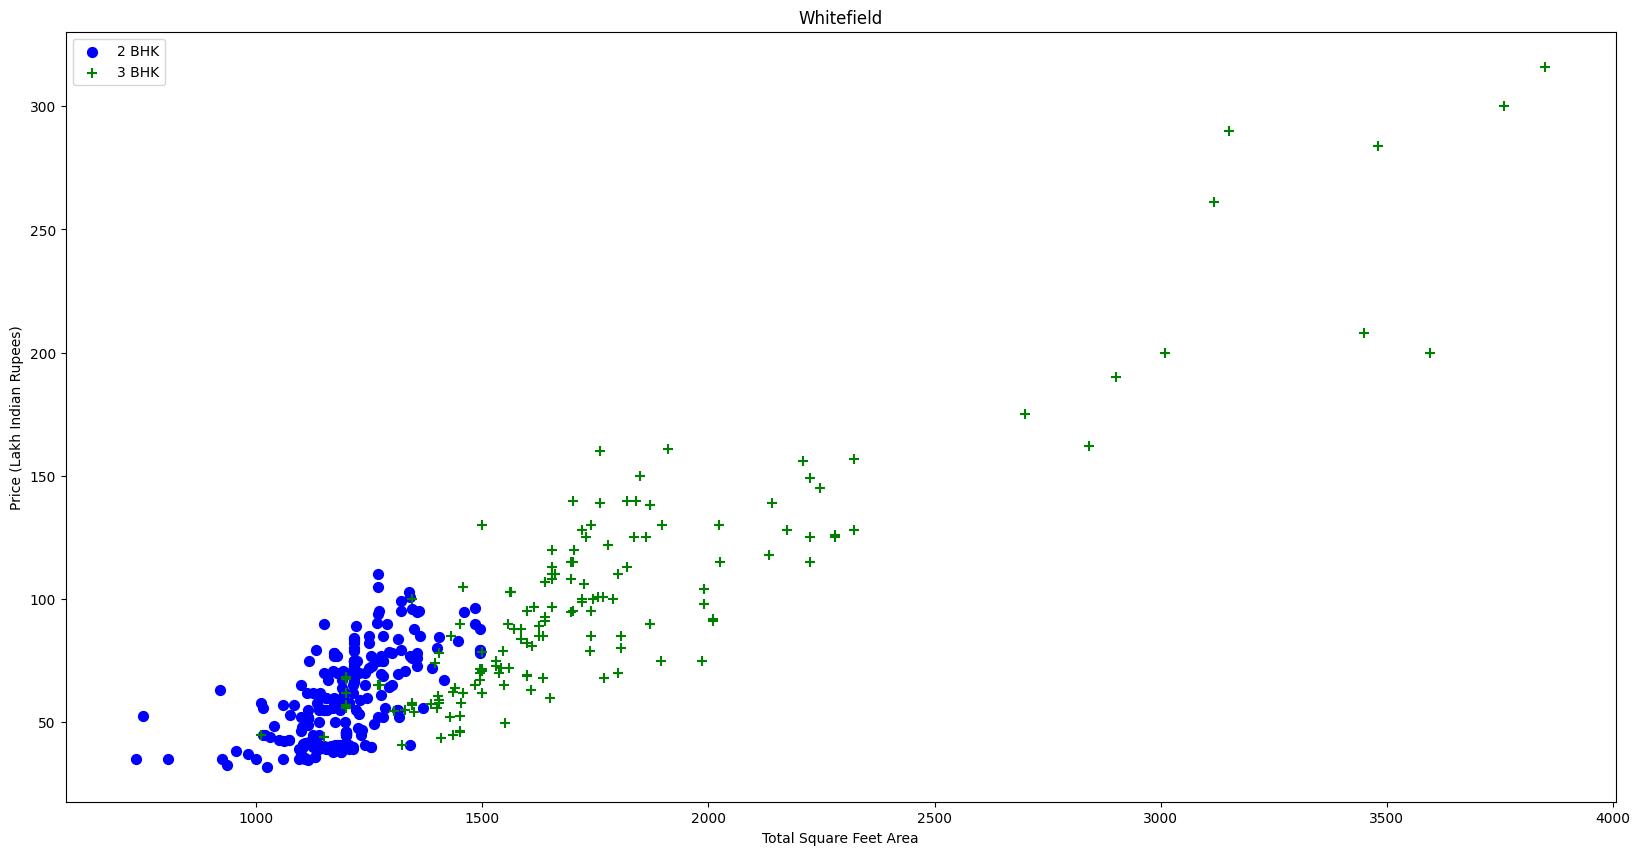

In [36]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    
    plt.figure(figsize=(20, 10))
    
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Whitefield")

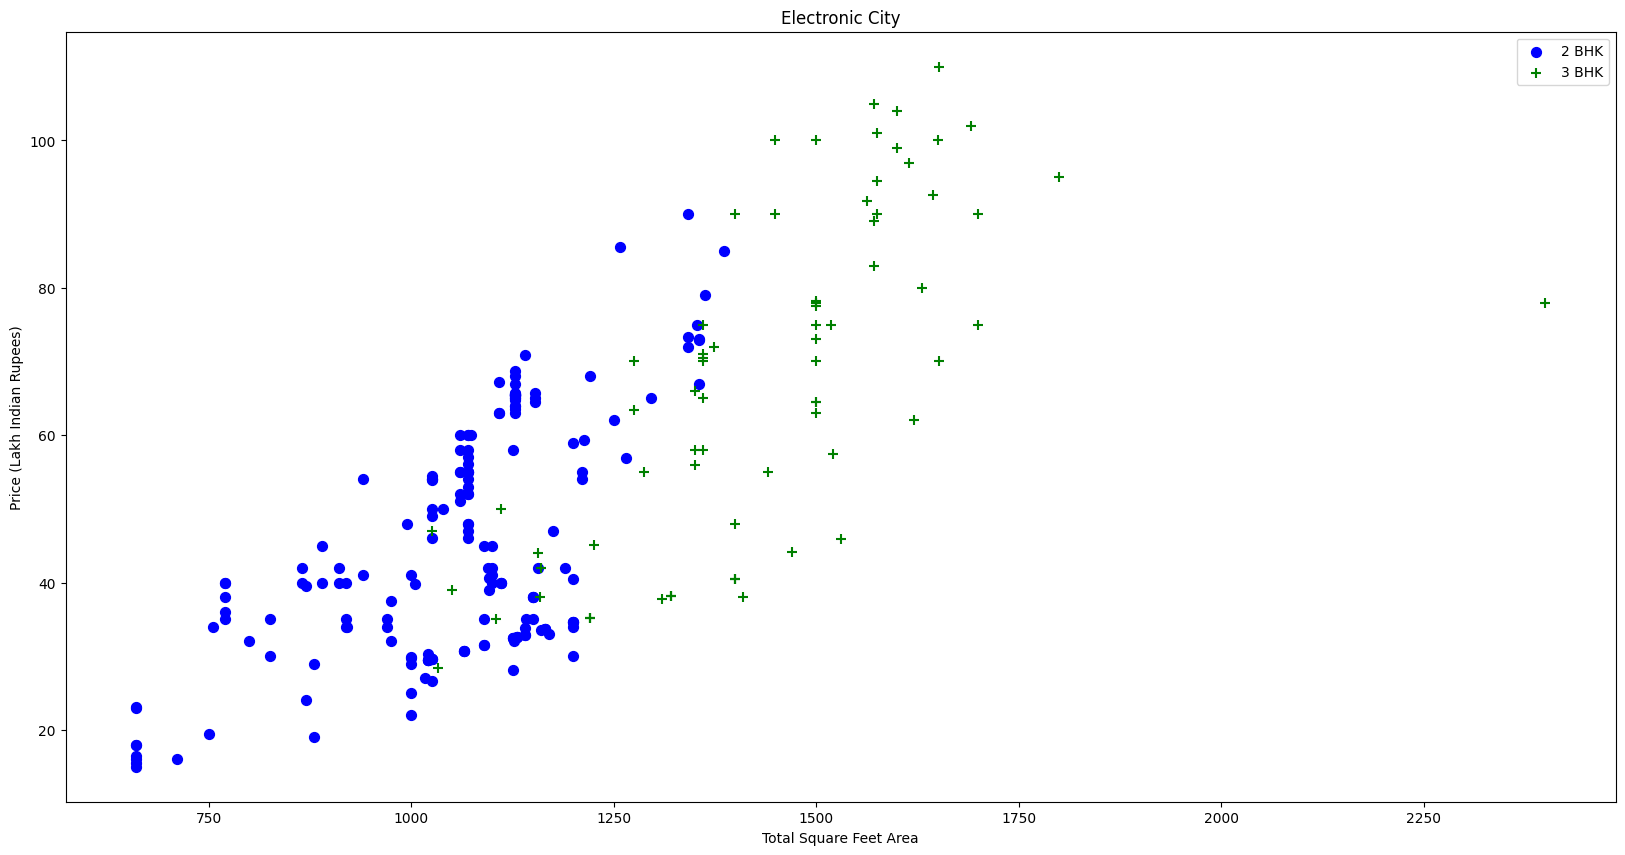

In [37]:
plot_scatter_chart(df7,"Electronic City")

### Removing Outliers Based on BHK (Bedrooms, Hall, and Kitchen)

Here we define a function called remove_bhk_outliers that identifies and removes outliers in the **'price_per_sqft'** column within each location, taking into consideration different BHK property types. The function calculates statistics such as mean and standard deviation for **'price_per_sqft'** for each BHK type within each location. It then iteratively compares the price per square foot of a specific BHK type with the mean of the previous BHK type (e.g., 3 BHK vs. 2 BHK) and excludes data points that fall below the mean.

In [38]:
def bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    df_cleaned = df.drop(exclude_indices, axis='index')
    return df_cleaned

df8 = bhk_outliers(df7)
df8.shape

(6972, 7)

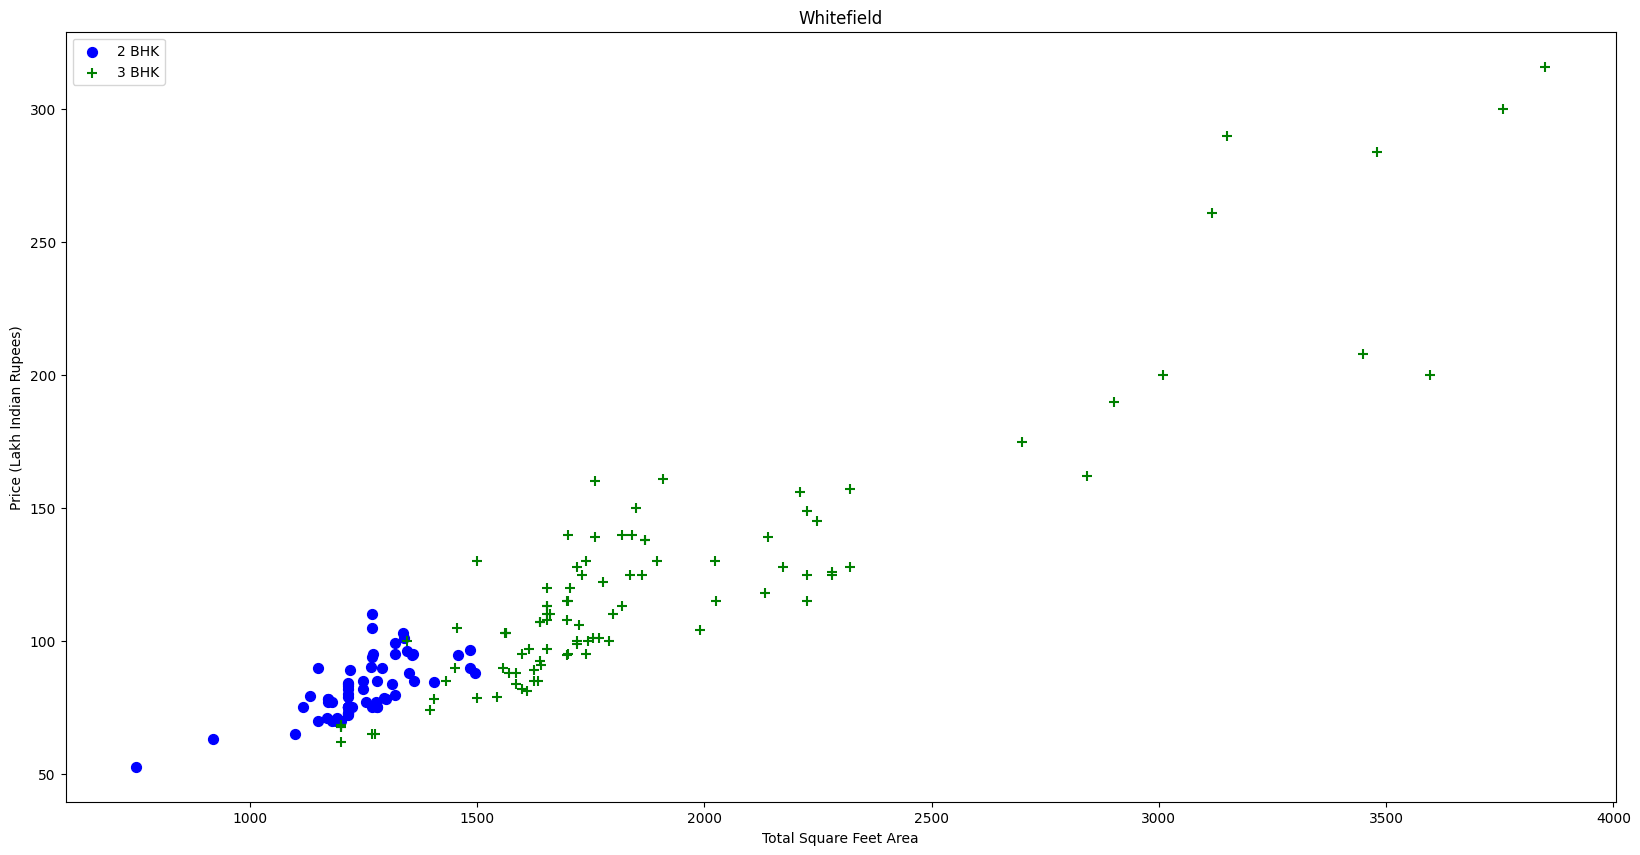

In [39]:
plot_scatter_chart(df8,"Whitefield")

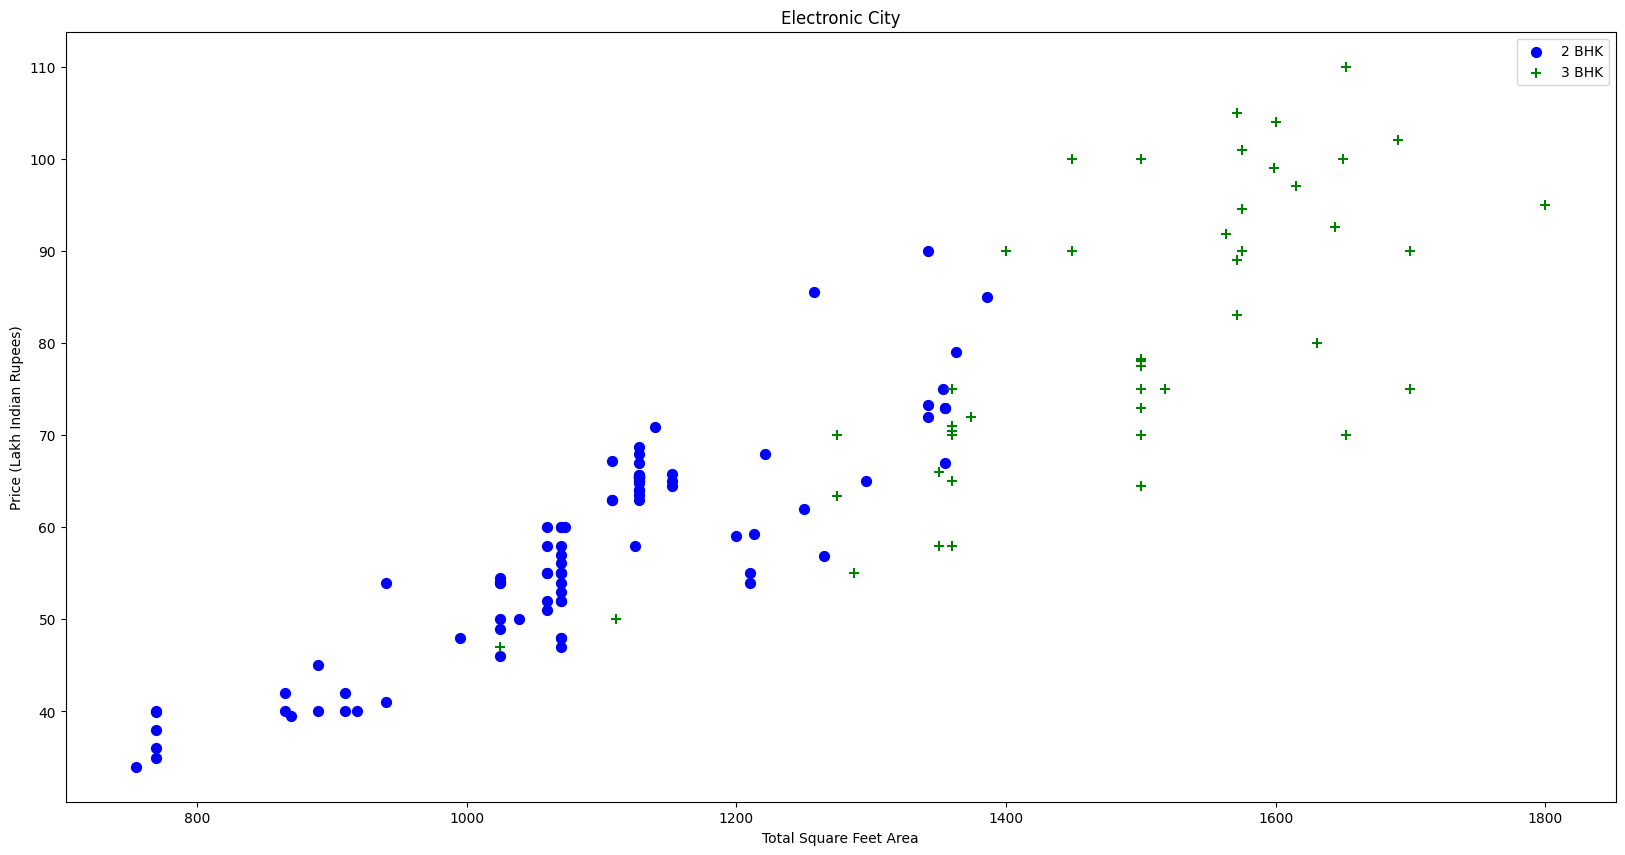

In [40]:
plot_scatter_chart(df8,"Electronic City")

### Distribution of Price Per Square Feet

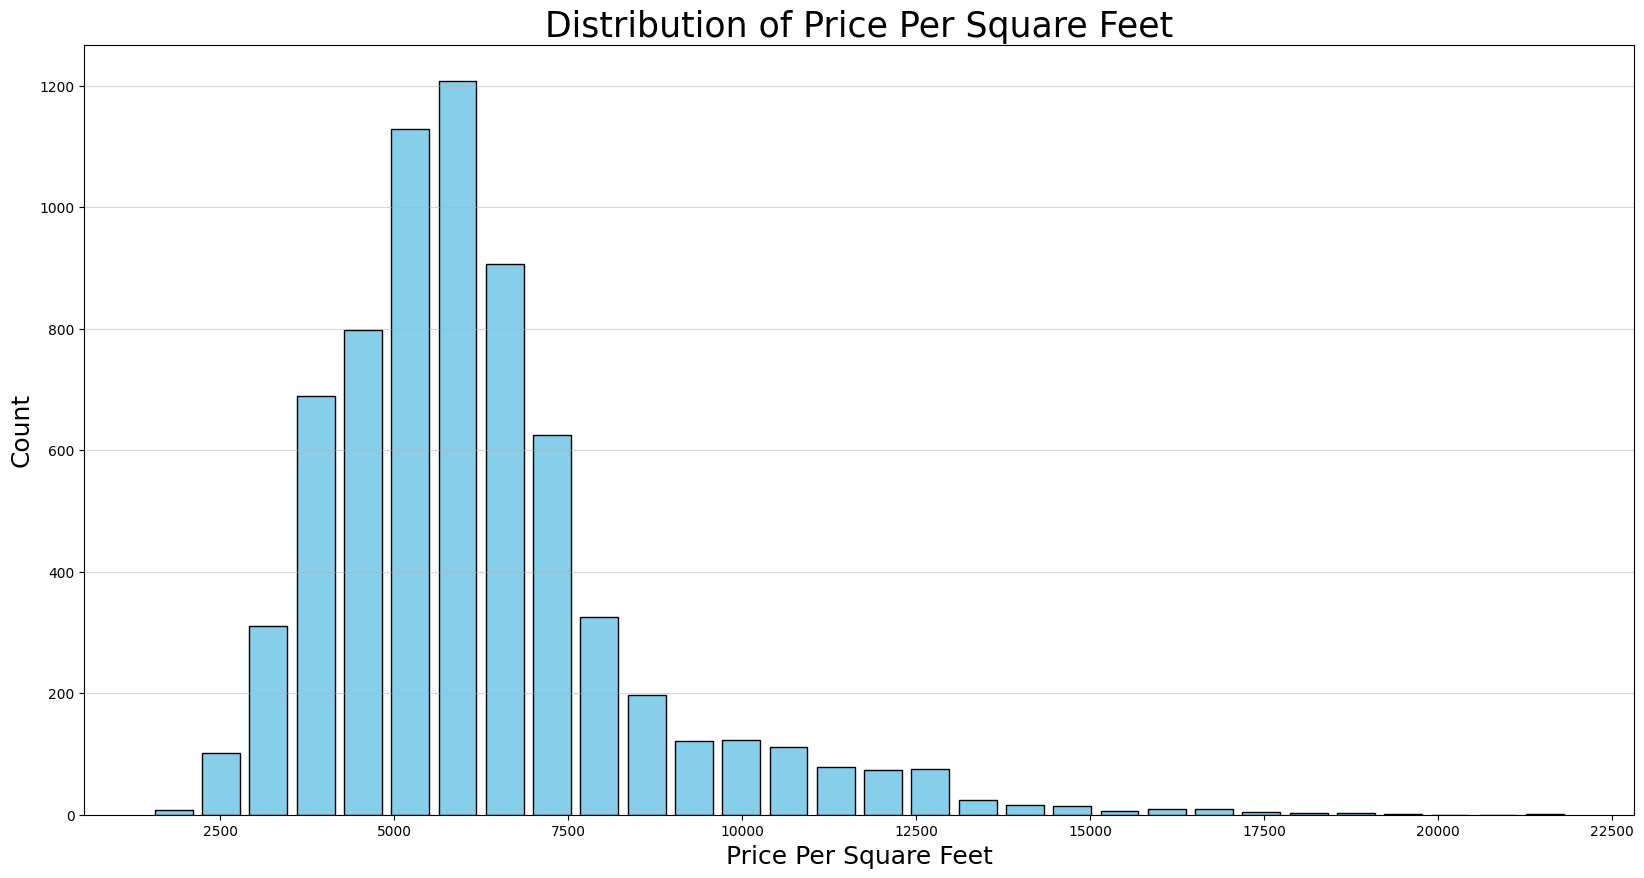

In [41]:
plt.figure(figsize=(20, 10))

plt.hist(df8.price_per_sqft, bins=30, rwidth=0.8, color='skyblue', edgecolor='black')

plt.xlabel("Price Per Square Feet", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Distribution of Price Per Square Feet", fontsize=25)

plt.grid(axis='y', alpha=0.50)

plt.show()

### Distribution of Number of Bathrooms

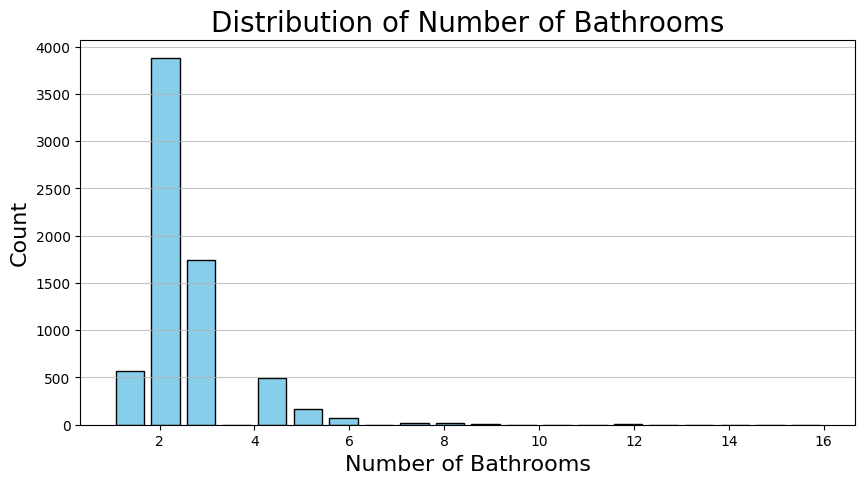

In [42]:
plt.figure(figsize=(10, 5))

plt.hist(df8.bath, bins=20, rwidth=0.8, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed

plt.xlabel("Number of Bathrooms", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Distribution of Number of Bathrooms", fontsize=20)

plt.grid(axis='y', alpha=0.75)

plt.show()

### Filtering Properties Based on Bathroom Count

In [43]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7820,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
7963,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9042,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9215,other,10 BHK,4000.0,12.0,160.0,10,4000.000000
9554,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [44]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5810,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
7698,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9915,other,4 Bedroom,7000.0,8.0,450.0,4,6428.571429


In [45]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(6893, 7)

In [46]:
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
2,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667
3,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525
5,1st Phase JP Nagar,3 BHK,2059.0,3.0,225.0,3,10927.634774
6,1st Phase JP Nagar,2 BHK,1394.0,2.0,100.0,2,7173.601148


### Removing Unnecessary Columns

In [47]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,1500.0,5.0,85.0,5
3,1st Phase JP Nagar,2065.0,4.0,210.0,3
5,1st Phase JP Nagar,2059.0,3.0,225.0,3
6,1st Phase JP Nagar,1394.0,2.0,100.0,2


### Creating Dummy Variables for Location

Dummy variables are created to represent categorical data in a binary format.

In [48]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Combining DataFrames to Incorporate Location Information

In [49]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Phase JP Nagar,1500.0,5.0,85.0,5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Phase JP Nagar,2065.0,4.0,210.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1st Phase JP Nagar,2059.0,3.0,225.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1st Phase JP Nagar,1394.0,2.0,100.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
df12 = df11.drop('location',axis='columns')
df12.head(30)

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1875.0,3.0,167.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1500.0,5.0,85.0,5,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2065.0,4.0,210.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2059.0,3.0,225.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1394.0,2.0,100.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,1077.0,2.0,93.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1566.0,2.0,180.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,840.0,2.0,50.0,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,1590.0,3.0,131.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,2180.0,3.0,210.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
df12.shape

(6893, 147)

### Preparing Feature Data

In [52]:
X = df12.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1875.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1500.0,5.0,5,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2065.0,4.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2059.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1394.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
X.shape

(6893, 146)

### Preparing Target Variable Data

In [54]:
y = df12.price
y.head()

1    167.0
2     85.0
3    210.0
5    225.0
6    100.0
Name: price, dtype: float64

In [55]:
len(y)

6893

## Model Building

### Splitting Data into Training and Testing Sets

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### LinearRegression

In [57]:
parameters = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive': [True, False]}

lr = LinearRegression()

lr_cv = GridSearchCV(estimator=lr, cv=5, param_grid=parameters, n_jobs = -1)
%time lr_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",lr_cv.best_params_)
print("accuracy :",lr_cv.best_score_)

CPU times: total: 344 ms
Wall time: 4.44 s
tuned hpyerparameters :(best parameters)  {'copy_X': True, 'fit_intercept': False, 'positive': False}
accuracy : 0.8391217053423544


In [58]:
# on training set
y_train_predict = lr_cv.predict(X_train)

mse = mean_squared_error(y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R²):", round(r2, 2))

# on testing set
y_test_predict = lr_cv.predict(X_test)

mse = mean_squared_error(y_test, y_test_predict)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("\nThe model performance for testing set")
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R²):", round(r2, 2))

The model performance for training set
Mean Squared Error (MSE): 1152.69
Root Mean Squared Error (RMSE): 33.95
R-squared (R²): 0.84

The model performance for testing set
Mean Squared Error (MSE): 791.98
Root Mean Squared Error (RMSE): 28.14
R-squared (R²): 0.85


### Gradient Boosting Regressor

In [59]:
parameters = {'n_estimators': [400, 500],
              'learning_rate': [0.5, 0.75],
              'max_depth': [1, 2],
              'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
              'criterion': ['friedman_mse', 'squared_error']}

xgb = GradientBoostingRegressor()

xgb_cv = GridSearchCV(estimator=xgb, cv=5, param_grid=parameters, n_jobs = -1)
%time xgb_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",xgb_cv.best_params_)
print("accuracy :",xgb_cv.best_score_)

CPU times: total: 4.56 s
Wall time: 2min 25s
tuned hpyerparameters :(best parameters)  {'criterion': 'squared_error', 'learning_rate': 0.5, 'loss': 'squared_error', 'max_depth': 2, 'n_estimators': 400}
accuracy : 0.8427592483595306


In [60]:
# on training set
y_train_predict = xgb_cv.predict(X_train)

mse = mean_squared_error(y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R²):", round(r2, 2))

# on testing set
y_test_predict = xgb_cv.predict(X_test)

mse = mean_squared_error(y_test, y_test_predict)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("\nThe model performance for testing set")
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R²):", round(r2, 2))

The model performance for training set
Mean Squared Error (MSE): 373.56
Root Mean Squared Error (RMSE): 19.33
R-squared (R²): 0.95

The model performance for testing set
Mean Squared Error (MSE): 680.58
Root Mean Squared Error (RMSE): 26.09
R-squared (R²): 0.87


### Ridge

In [61]:
parameters = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive': [True, False],
              'solver': ['auto']}

rr = Ridge()

rr_cv = GridSearchCV(estimator=rr, cv=5, param_grid=parameters, n_jobs = -1)
%time rr_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",rr_cv.best_params_)
print("accuracy :",rr_cv.best_score_)

CPU times: total: 234 ms
Wall time: 408 ms
tuned hpyerparameters :(best parameters)  {'copy_X': True, 'fit_intercept': False, 'positive': False, 'solver': 'auto'}
accuracy : 0.8387732004755808


In [62]:
# on training set
y_train_predict = rr_cv.predict(X_train)

mse = mean_squared_error(y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R²):", round(r2, 2))

# on testing set
y_test_predict = rr_cv.predict(X_test)

mse = mean_squared_error(y_test, y_test_predict)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("\nThe model performance for testing set")
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R²):", round(r2, 2))

The model performance for training set
Mean Squared Error (MSE): 1155.72
Root Mean Squared Error (RMSE): 34.0
R-squared (R²): 0.84

The model performance for testing set
Mean Squared Error (MSE): 795.35
Root Mean Squared Error (RMSE): 28.2
R-squared (R²): 0.85


### Lasso

In [63]:
parameters = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive': [True, False],
              'alpha': [1,2],
              'selection': ['random', 'cyclic']}

la = Lasso()

la_cv = GridSearchCV(estimator=la, cv=5, param_grid=parameters, n_jobs = -1)
%time la_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",la_cv.best_params_)
print("accuracy :",la_cv.best_score_)

CPU times: total: 1.02 s
Wall time: 2.69 s
tuned hpyerparameters :(best parameters)  {'alpha': 1, 'copy_X': False, 'fit_intercept': True, 'positive': True, 'selection': 'random'}
accuracy : 0.7546137907259217


In [64]:
# on training set
y_train_predict = la_cv.predict(X_train)

mse = mean_squared_error(y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R²):", round(r2, 2))

# on testing set
y_test_predict = la_cv.predict(X_test)

mse = mean_squared_error(y_test, y_test_predict)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("\nThe model performance for testing set")
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R²):", round(r2, 2))

The model performance for training set
Mean Squared Error (MSE): 1764.39
Root Mean Squared Error (RMSE): 42.0
R-squared (R²): 0.76

The model performance for testing set
Mean Squared Error (MSE): 1252.77
Root Mean Squared Error (RMSE): 35.39
R-squared (R²): 0.77


### Scatter Plot of Actual vs. Predicted Values

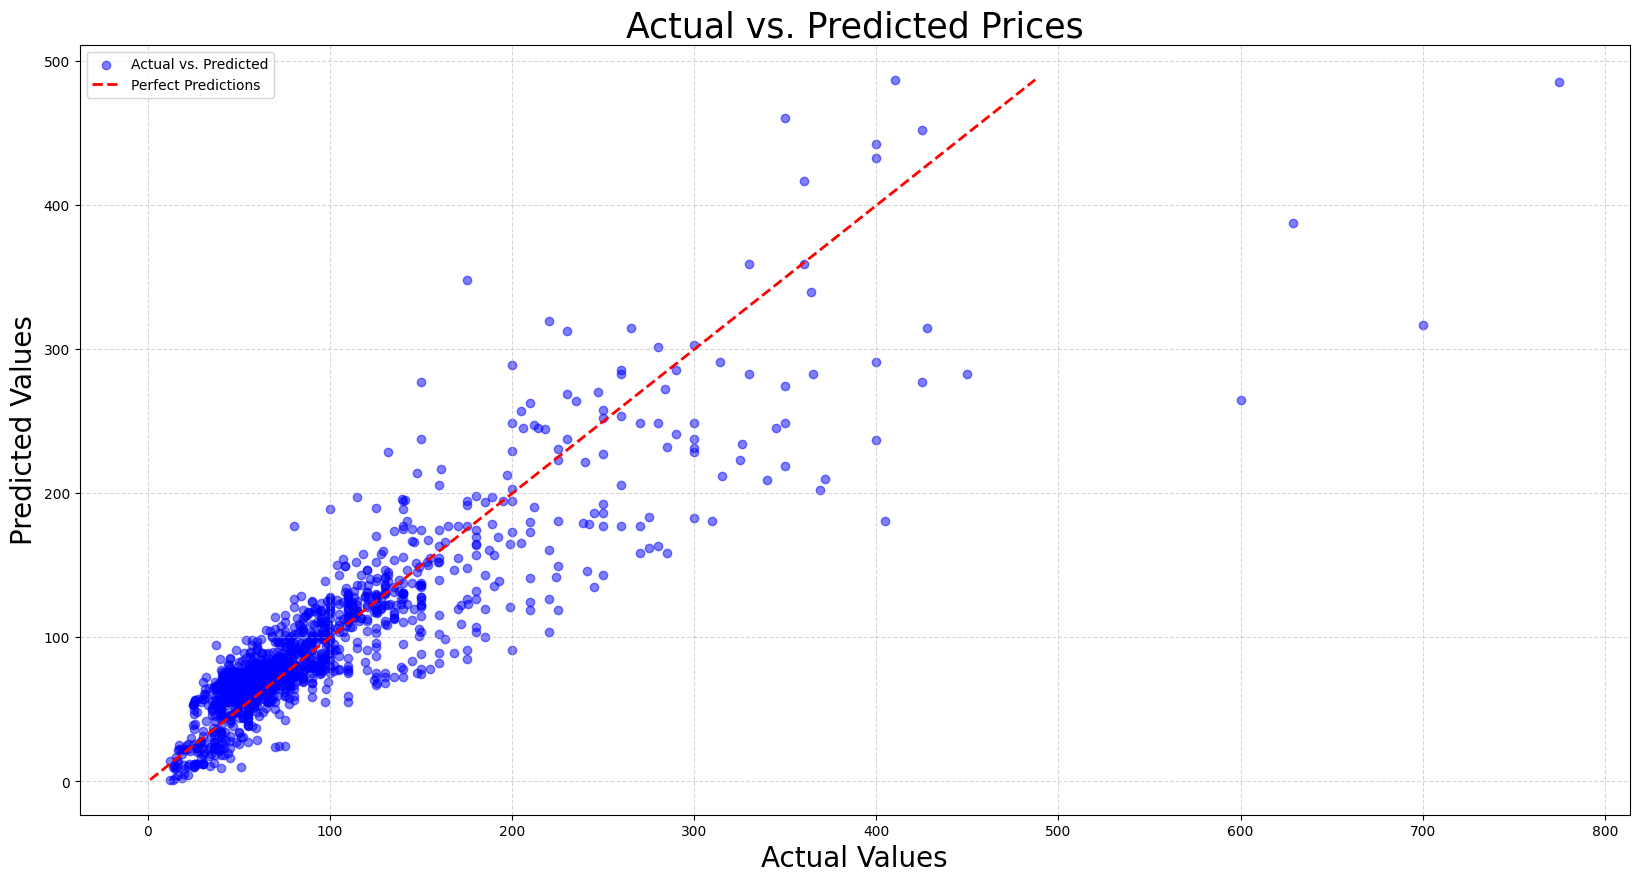

In [65]:
plt.figure(figsize=(20, 10))

plt.scatter(y_test, y_test_predict, alpha=0.5, color='blue', label='Actual vs. Predicted')

plt.plot([min(y_test_predict), max(y_test_predict)],[min(y_test_predict), max(y_test_predict)], color='red', linestyle='--', lw=2, label='Perfect Predictions')

plt.xlabel('Actual Values', fontsize=20)
plt.ylabel('Predicted Values', fontsize=20)
plt.title('Actual vs. Predicted Prices', fontsize=25)

plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


### Property Price Prediction Function

Predicts the price of a property based on the specified features, including **location**, **total square feet area**, **number of bathrooms**, and **number of bedrooms (BHK)**.

In [66]:
def predict_price1(location, total_sqft, bath, bhk):
    if location in X.columns:
        loc_index = X.columns.get_loc(location)
    else:
        return "Location not found in the dataset."

    x = np.zeros(len(X.columns))

    x[0] = total_sqft
    x[1] = bath
    x[2] = bhk

    x[loc_index] = 1

    predicted_price = xgb_cv.predict([x])[0]

    return predicted_price


In [67]:
predict_price1('Whitefield',2000, 3, 4)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


149.42981735510267

In [68]:
predict_price1('Sarjapur  Road',1000, 2, 2)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


56.20098662356184

In [69]:
predict_price1('Electronic City',2500, 3, 3)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


161.47328789806258

In [70]:
predict_price1('Kanakpura Road',3000, 2, 3)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


221.35479444148237

In [71]:
predict_price1('Thanisandra',1500, 2, 2)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


98.24200500068105

### Saving the Trained Model

This step is essential for preserving the trained model so that it can be loaded and reused for making predictions on new data without the need to retrain the model each time. The saved model file can be used in future applications for property price predictions.

In [72]:
import pickle
with open('Banglore_House_Prices_Prediction.pickle','wb') as f:
    pickle.dump(xgb_cv, f, protocol=4)
    

### Saving Feature Columns as JSON

This JSON file can be useful for future reference, especially when deploying the model in production, as it provides information about the expected feature names for input data.

In [73]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("Columns.json","w") as f:
    f.write(json.dumps(columns))
    